# Project: Investigate a Dataset - TMDb-Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
<li><a href="#rq1">Research Question 1</a></li>
<li><a href="#rq2">Research Question 2</a></li>
<li><a href="#rq3">Research Question 3</a></li>
<li><a href="#rq4">Research Question 4</a></li>
<li><a href="#rq5">Research Question 5</a></li>
<li><a href="#rq6">Research Question 6</a></li>
<li><a href="#rq7">Research Question 7</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 




### Question(s) for Analysis

- #### Highest grossing Primary Director?
- #### Which film was the highest profitting for the top 20 highest profiting Primary Directors?
- #### What is the average popularity score for each Primary Director?
- #### Which film was the highest popularity score for the Primary Directors?
- #### What was the highest rated genre vs the highest profitting genre? 
- #### What was the highest rated genre per director vs highest profitting genre per director?
- #### When reviewing all the dataframes showing the top Directors using various metrics how frequently does each Director appear in the top 20?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from datetime import timedelta,date as dt
import difflib
import plotly.express as px
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.tail().sort_values(by='release_date')

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0


### Reviewing dataset: 
Column count, row count, missing data, duplicate data, questions to ask, unneeded columns.  
Potentially remove columns: 
 - homepage
 - tagline
 - keywords
 - overview
 - imdb_id
 - budget_adj
 - revenue_adj

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

Out of needed series the following Missing Data needs to be considered:
- production_companies 9836/10866
- genres 10843/10866
- cast 10790/10866


In [5]:
sum(df.duplicated())

1

In [6]:
type(df['release_date'][0])

str

### Data Cleaning
 

>Removing/Dropping series that are not needed to analyze the questions.

In [7]:
df.drop(['homepage', 'tagline', 'keywords', 'overview', 'runtime','imdb_id', 'budget_adj', 'revenue_adj'
         ,'vote_average','release_year','vote_count'], axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   director              10822 non-null  object 
 7   genres                10843 non-null  object 
 8   production_companies  9836 non-null   object 
 9   release_date          10866 non-null  object 
dtypes: float64(1), int64(3), object(6)
memory usage: 849.0+ KB


In [8]:
df.drop_duplicates(inplace=True)
sum(df.duplicated())

0

In [9]:
df.describe()

,id,popularity,budget,revenue
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09


changing the release date into a date in order to review varying uses of the date. 

In [10]:
def fix_date(x):
    if x.year > 2022:
        year = x.year - 100
    else:
        year = x.year
    return pd.datetime(year,x.month,x.day)

df['release_date'] =  pd.to_datetime(df['release_date'])
df['release_date'] = df['release_date'].apply(fix_date)

/var/folders/wf/_x5mxls94p92t_39895yg9pm0000gq/T/ipykernel_71090/1207862680.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  return pd.datetime(year,x.month,x.day)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    10865 non-null  int64         
 1   popularity            10865 non-null  float64       
 2   budget                10865 non-null  int64         
 3   revenue               10865 non-null  int64         
 4   original_title        10865 non-null  object        
 5   cast                  10789 non-null  object        
 6   director              10821 non-null  object        
 7   genres                10842 non-null  object        
 8   production_companies  9835 non-null   object        
 9   release_date          10865 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 933.7+ KB


>Split the cast and production into seperate columns, then drop the original columns. 

In [12]:
df[['actor1','actor2','actor3','actor4','actor5']] = df.cast.str.split(pat='|', expand = True)
df.drop(['cast'],axis=1,inplace=True)

In [13]:
df[['production_company1','production_company2','production_company3','production_company4',
    'production_company5']] = df.production_companies.str.split(pat='|',expand=True)
df.drop(['production_companies'],axis=1,inplace=True)


> Considering/Assuming the first genre listed in the string to be the 'primary' genre. 

In [14]:
df['primary_genre'] = df['genres'].str.split('|').str[0]

Only review the first 2 directors, split into 2 different columns. 
> Considering/Assuming the first Director listed in the string is the Primary Director. 

In [15]:
df['director_primary'] = df['director'].str.split('|').str[0]
df['director_secondary'] = df['director'].str.split('|').str[1]
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10865 non-null  int64         
 1   popularity           10865 non-null  float64       
 2   budget               10865 non-null  int64         
 3   revenue              10865 non-null  int64         
 4   original_title       10865 non-null  object        
 5   director             10821 non-null  object        
 6   genres               10842 non-null  object        
 7   release_date         10865 non-null  datetime64[ns]
 8   actor1               10789 non-null  object        
 9   actor2               10645 non-null  object        
 10  actor3               10555 non-null  object        
 11  actor4               10446 non-null  object        
 12  actor5               10133 non-null  object        
 13  production_company1  9835 non-n

> Merge the cast and production colums together into lists. 

In [16]:
# Merge and covnert to lists in order to be easily iteratted through
df['cast_list'] = df[df.columns[8:13]].values.tolist()
df['prod_companies_list'] = df[df.columns[13:18]].values.tolist()

In [17]:
# Drop the multiple actor and production company columns only leaving `cast_list` and `prod_companies_list`
df.drop(['actor1','actor2','actor3','actor4','actor5',
         'production_company1', 'production_company2', 'production_company3', 
         'production_company4', 'production_company5', 'director'], axis=1, inplace=True)

In [18]:
# Create a `profit` column
df['profit'] = df['revenue'].subtract(df['budget'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   10865 non-null  int64         
 1   popularity           10865 non-null  float64       
 2   budget               10865 non-null  int64         
 3   revenue              10865 non-null  int64         
 4   original_title       10865 non-null  object        
 5   genres               10842 non-null  object        
 6   release_date         10865 non-null  datetime64[ns]
 7   primary_genre        10842 non-null  object        
 8   director_primary     10821 non-null  object        
 9   director_secondary   754 non-null    object        
 10  cast_list            10865 non-null  object        
 11  prod_companies_list  10865 non-null  object        
 12  profit               10865 non-null  int64         
dtypes: datetime64[ns](1), float64(1

In [20]:
df.describe()

,id,popularity,budget,revenue,profit
count,10865.000000,10865.000000,1.086500e+04,1.086500e+04,1.086500e+04
mean,66066.374413,0.646446,1.462429e+07,3.982690e+07,2.520261e+07
std,92134.091971,1.000231,3.091428e+07,1.170083e+08,9.659103e+07
min,5.000000,0.000065,0.000000e+00,0.000000e+00,-4.139124e+08
25%,10596.000000,0.207575,0.000000e+00,0.000000e+00,0.000000e+00
50%,20662.000000,0.383831,0.000000e+00,0.000000e+00,0.000000e+00
75%,75612.000000,0.713857,1.500000e+07,2.400000e+07,9.092453e+06
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,2.544506e+09


Getting inflation adjustment to ensure review of the profit takes into consideration the value of the money during the time the 'revenue - budget = profit' was logged.  

In [21]:
# Define a function to get inflation rates from the BLS API
def get_inflation_rates(start_year, end_year):
    base_url = 'https://api.bls.gov/publicAPI/v2/timeseries/data/'
    series_id = 'CUUR0000SA0'
    headers = {'Content-type': 'application/json'}
    data = '{"seriesid":["' + series_id + '"],"startyear":"' + str(start_year) + '","endyear":"' + str(end_year) + '"}'
    response = requests.post(base_url, headers=headers, data=data)
    json_data = response.json()['Results']['series'][0]['data']
    inflation_rates = {int(d['year']): float(d['value']) for d in json_data}
    return inflation_rates

# Get the inflation rates for the years in the DataFrame
start_year = df['release_date'].min().year
end_year = df['release_date'].max().year
inflation_rates = get_inflation_rates(start_year, end_year)

# Define a function to adjust for inflation using the CPI
def adjust_for_inflation(amount, year):
    cpi_year = min(year, max(inflation_rates.keys()))
    cpi = inflation_rates[cpi_year]
    latest_cpi_year = max(inflation_rates.keys())
    latest_cpi = inflation_rates[latest_cpi_year]
    
    # Calculate the inflation factor based on the latest CPI
    inflation_factor = latest_cpi / cpi
    adjusted_amount = amount * inflation_factor
    
    return adjusted_amount  

# Apply the inflation adjustment to the profit column
df['profit_infl_adj'] = df.apply(lambda x: adjust_for_inflation(x['profit'], x['release_date'].year), axis=1)


In [22]:
df['profit_infl_adj'] = df['profit_infl_adj'].astype(int)

<a id='eda'></a>
## Exploratory Data Analysis


### Comparing the top Directors in the following fields to eachother:
- Highest Profit Total
- Highest Profit Average Per Film
- Highest Popularity Score Average Per Director
- Highest Rated (Popularity) Genre
- Highest Profit Per Genre
- Highest Rated (Popularity) Genre Per Director 
- Highest Profit Per Genre Per Director
> Comparing to see if there are corrolations or changes on which Directors are in the top 20 depending on the metric used to messure. Are there consistency and commonalities? 


<a id='rq1'></a>
### Research Question 1 - Highest grossing Primary Director?

- Grouping by Director to get an aggregated list. 
- Finding total made by displaying the sum of the revenue for all the films a director made minus the sum of the budget (ie profit. 
- Using the profit amount adjusted for inflation.

In [23]:
# Used a mask in order to limit views to films with a release date of 2000-01-01 or later. 
mask = (df['release_date'] >= '2000-01-01')
date_mask = df.loc[mask]

In [24]:
by_pd = date_mask.groupby(['director_primary'],sort=False).aggregate({'profit_infl_adj':['sum','count']})

# Flatten column names
by_pd.columns = ['total_profit', 'film_count']

# Sort the values in descending order
sorted_bypd = by_pd.sort_values(by='total_profit', ascending=False)

# Reset index and add a new index
top_2000 = sorted_bypd.reset_index()

# Rename the columns
top_2000.columns = ['director_primary', 'total_profit', 'film_count'] 


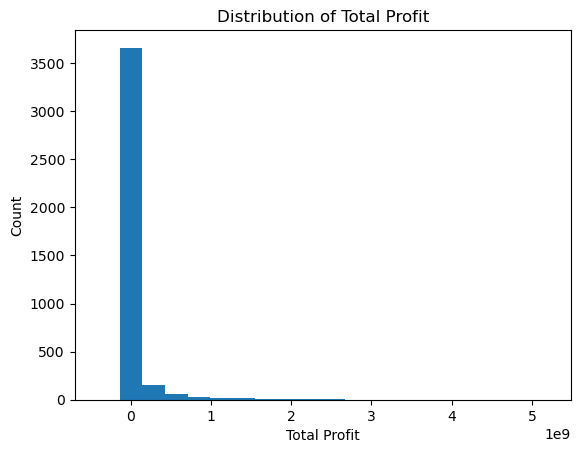

In [25]:
plt.hist(top_2000['total_profit'], bins=20)
plt.title('Distribution of Total Profit')
plt.xlabel('Total Profit')
plt.ylabel('Count')
plt.show()

<a id='fig1.1'>Figure 1.1</a>
The histogram provides an overview of the distribution of total_profit.

In [26]:
by_pd2 = df.groupby(['director_primary'],sort=False).aggregate({'profit_infl_adj':['sum','count']})
by_pd2.columns = ['total_profit', 'film_count']

sorted_bypd = by_pd2.sort_values(by='total_profit', ascending=False)

top_all_time = sorted_bypd.reset_index()
top_all_time.columns = ['director_primary', 'total_profit', 'film_count'] 

Created the same group by and aggregation for the whole data set in order to see the differences when taking into account movies prior to 2000. 

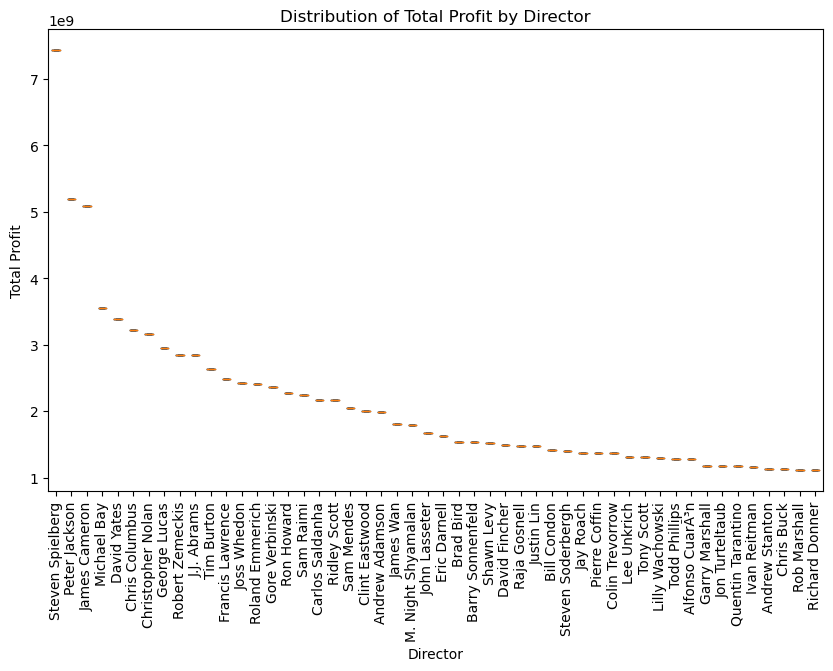

In [27]:
# Limiting to the top 50 in order to see the box plot clearly. 
top_directors = top_all_time.head(50)

# Create a box plot for the distribution of total_profit by director_primary
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot([top_directors[top_directors['director_primary']==director]['total_profit'] for director in top_directors['director_primary']])
ax.set_xticklabels(top_directors['director_primary'], rotation=90)
ax.set_title('Distribution of Total Profit by Director')
ax.set_xlabel('Director')
ax.set_ylabel('Total Profit')
plt.show()

<a id='fig1.2'>Figure 1.2</a>
The box plot allows us to compare the distribution of total_profit for each director_primary.

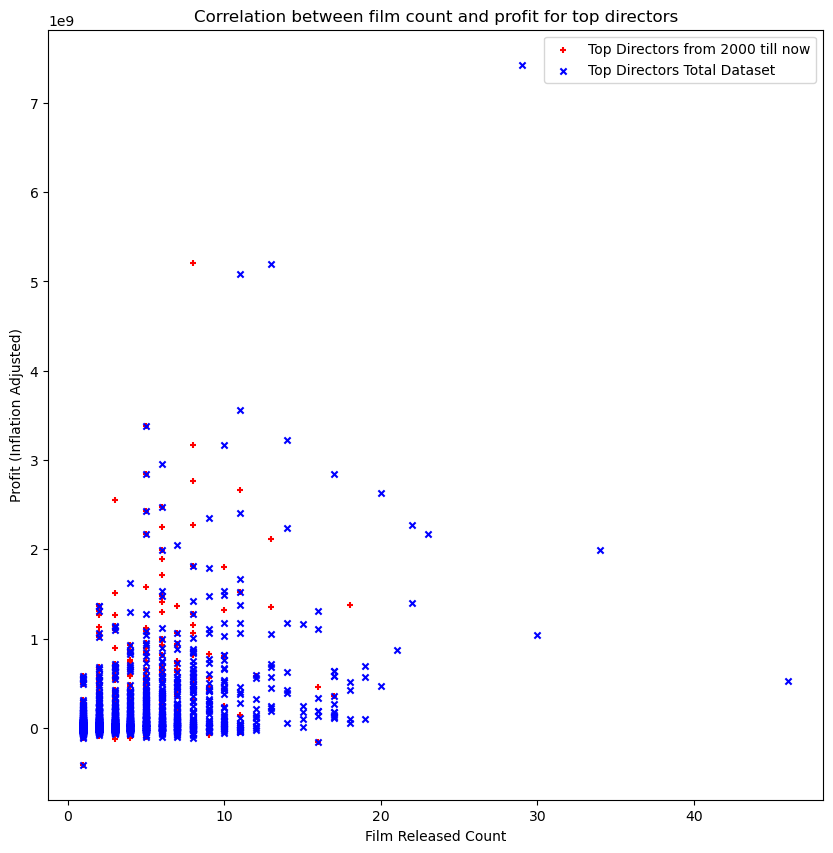

In [28]:
ax = top_2000.plot.scatter(x='film_count', y='total_profit',
                           label='Top Directors from 2000 till now', 
                           color='r', marker='+', figsize=(10,10))
top_all_time.plot.scatter(x='film_count', y='total_profit',
                          label='Top Directors Total Dataset', 
                          color='b', marker='x', ax=ax, figsize=(10,10))
# set the x and y-axis labels
ax.set_title('Correlation between film count and profit for top directors')
ax.set_xlabel('Film Released Count')
ax.set_ylabel('Profit (Inflation Adjusted)')

# show the plot
plt.show()

<a id='fig1.3'>Figure 1.3</a>
When reviewing the scatter plot we can see that the profit (inflation adjusted) is higher for those with between 8-15 films released vs those with 15 or more. 

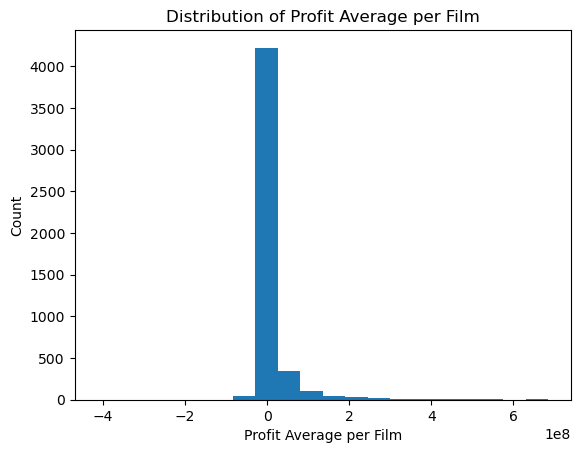

In [29]:
# Looking at the mean of `profit_infl_adj` in the `top_all_time`. 
top_all_time['profit_avg_per_film'] = top_all_time['total_profit'] / top_all_time['film_count']
top_all_time['profit_avg_per_film'] = top_all_time['profit_avg_per_film'].astype(int)
top_all_time

plt.hist(top_all_time['profit_avg_per_film'], bins=20)
plt.title('Distribution of Profit Average per Film')
plt.xlabel('Profit Average per Film')
plt.ylabel('Count')
plt.show()

<a id='fig1.4'>Figure 1.4</a>
This histogram can help us examine the distribution of the profit_avg_per_film feature and identify any outliers or patterns in the data.

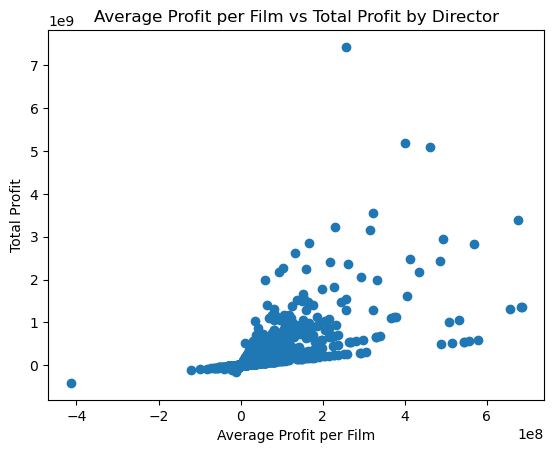

In [30]:
plt.scatter(top_all_time['profit_avg_per_film'], top_all_time['total_profit'])

# Set the axis labels and title
plt.xlabel('Average Profit per Film')
plt.ylabel('Total Profit')
plt.title('Average Profit per Film vs Total Profit by Director')

plt.show()

<a id='fig1.5'>Figure 1.5</a>
The scatter plot shows the relationship between average profit per film and total profit for each director.

In [31]:
top_all_time = top_all_time[:50]

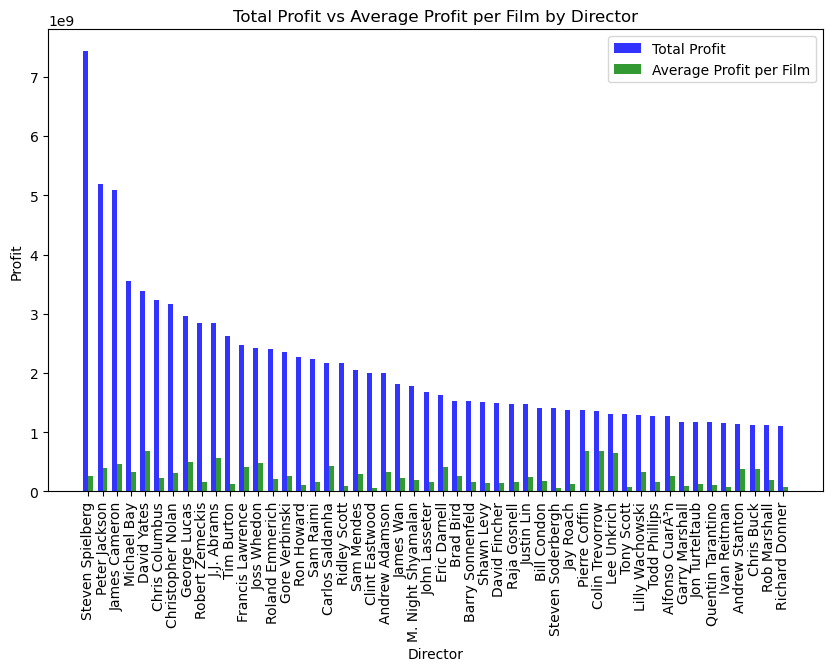

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
index = list(range(len(top_all_time)))

# Bar for total profit
total_profit_bar = ax.bar(index, top_all_time['total_profit'], bar_width,
                          alpha=opacity,
                          color='b',
                          label='Total Profit')

# Bar for average profit per film
avg_profit_bar = ax.bar([i + bar_width for i in index], top_all_time['profit_avg_per_film'], bar_width,
                        alpha=opacity,
                        color='g',
                        label='Average Profit per Film')

# Add labels and title
ax.set_xlabel('Director')
ax.set_ylabel('Profit')
ax.set_title('Total Profit vs Average Profit per Film by Director')
ax.set_xticks([i + bar_width / 2 for i in index])
ax.set_xticklabels(top_all_time.director_primary, rotation=90)

# Add legend
ax.legend()

plt.show()

<a id='fig1.6'>Figure 1.6</a>
The director Steven Spielberg has they highest total profit but one of the lowest profit averages per film. 

<a id='rq2'></a>
### Research Question 2  - Which film was the highest profitting for the top 20 highest profiting Primary Directors?

In [33]:
# Group data by director_primary column and apply agg function
high_low = df.groupby('director_primary').agg({
    'profit_infl_adj': ['max', 'min'], 
    'original_title': ['first', 'last']
})

# Rename columns
high_low.columns = ['highest_profit', 'lowest_profit', 'first_title', 'last_title']

# Show the result
high_low_by_director = high_low.sort_values(by='highest_profit', ascending=False)[:20]

high_low_by_director = high_low_by_director.reset_index()
high_low_by_director.columns = ['director_primary', 'highest_profit', 'lowest_profit', 'first_title', 'last_title'] 

high_low_by_director['difference_profit'] = (high_low_by_director['highest_profit']-high_low_by_director['lowest_profit'])


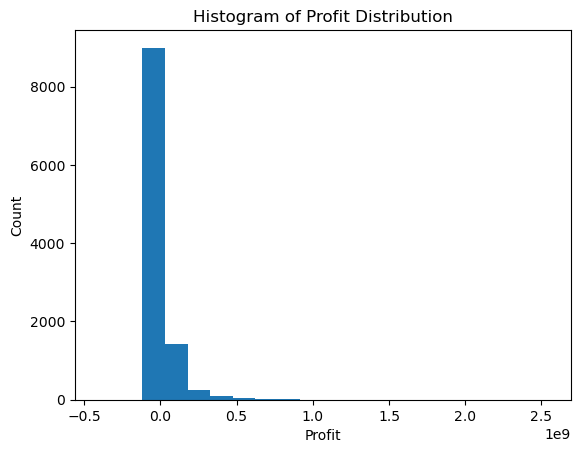

In [34]:
plt.hist(df['profit_infl_adj'], bins=20)
plt.title('Histogram of Profit Distribution')
plt.xlabel('Profit')
plt.ylabel('Count')
plt.show()

<a id='fig2.1'>Figure 2.1</a> 
The histogram of profits shows that the distribution is right-skewed, indicating that there are a few movies with very high profits that are driving the overall average.

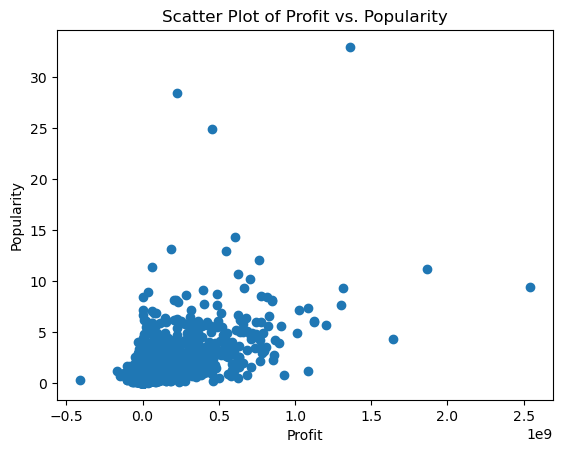

In [35]:
plt.scatter(df['profit_infl_adj'], df['popularity'])
plt.title('Scatter Plot of Profit vs. Popularity')
plt.xlabel('Profit')
plt.ylabel('Popularity')
plt.show()

<a id='fig2.2'>Figure 2.2</a> 
The scatter plot of profit vs. popularity shows that there is a positive correlation between profits and popularity, suggesting that movies with higher popularity tend to have higher profits.

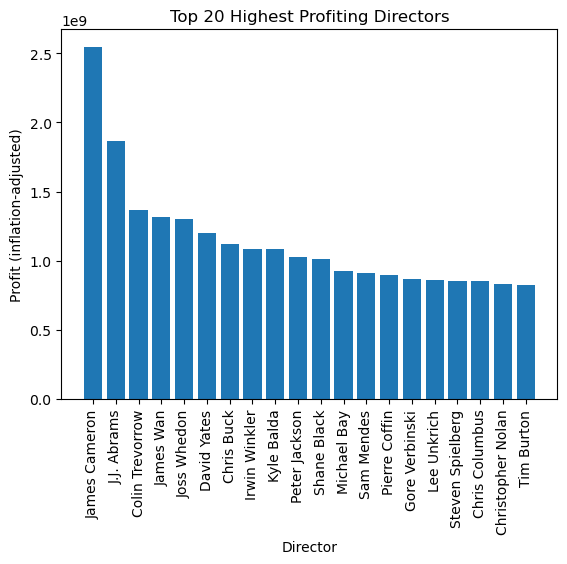

In [36]:
plt.bar(high_low_by_director['director_primary'], high_low_by_director['highest_profit'])
plt.title('Top 20 Highest Profiting Directors')
plt.xlabel('Director')
plt.ylabel('Profit (inflation-adjusted)')
plt.xticks(rotation=90)
plt.show()

<a id='fig2.3'>Figure 2.3</a>
The bar plot of the top 20 highest profiting directors shows that James Cameron has directed the most profitable movie among the top 20 highest profiting primary directors, with "Avatar" making over 2.7 billion dollars in inflation-adjusted profits.

In [37]:
mean_profit = high_low_by_director['highest_profit'].mean()
std_profit = high_low_by_director['highest_profit'].std()

print(f"Mean profit: {mean_profit:,.2f}")
print(f"Standard deviation of profit: {std_profit:,.2f}")

Mean profit: 1,137,619,107.00
Standard deviation of profit: 417,794,646.96


<a id='fig2.4'>Figure 2.4</a>
The mean profit of the top 20 highest profiting primary directors is 1,137,619,107 dollars, with a standard deviation of 417,794,646.96, indicating that there is a wide range of profits among the movies directed by these directors.

<a id='rq3'></a>
### Research Question 3 - What is the average popularity score for each Primary Director?


In [38]:
pop_d = df.groupby(['director_primary'],sort=False).aggregate({'popularity':['mean','count']})
pop_d.columns = ['avg_pop_score', 'film_count']

#The code also sorts the directors by their average popularity score and includes the film count for each director. 
sorted_popd = pop_d.sort_values(by='avg_pop_score', ascending=False) 

pop_by_director = sorted_popd.reset_index()
pop_by_director.columns = ['director_primary', 'avg_pop_score', 'film_count'] 


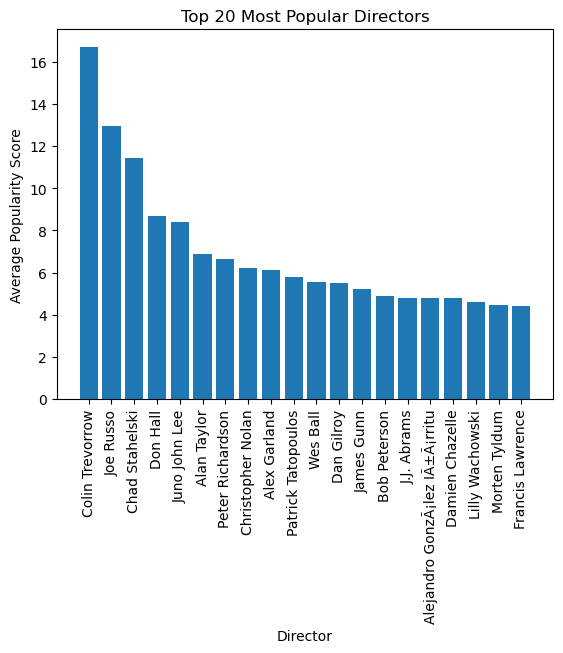

In [39]:
plt.bar(pop_by_director['director_primary'][:20], pop_by_director['avg_pop_score'][:20])
plt.title('Top 20 Most Popular Directors')
plt.xlabel('Director')
plt.ylabel('Average Popularity Score')
plt.xticks(rotation=90)
plt.show()

<a id='fig3.1'>Figure 3.1</a>
The barchart calculates the average popularity score for each primary director and visualizes the top 20 most popular directors. This uses the relevant staistics from the code for 'pop_by_director' to account for mean and count for each director.   

<a id='rq4'></a>
### Research Question 4 - Which film was the highest popularity score for the Primary Directors?

In [41]:
# Group data by director_primary column and apply agg function
high_low_pd = df.groupby('director_primary').agg({'popularity': ['max', 'min'], 
                                                  'original_title': ['first', 'last'],
                                                  'primary_genre': ['first', 'last']})

# Rename columns
high_low_pd.columns = ['highest_pop_score', 'lowest_pop_score', 'first_title', 'last_title', 'first_genre', 'last_genre']

# Sort by highest popularity score and reset index
high_low_pop_score = high_low_pd.sort_values(by=('highest_pop_score'), ascending=False).reset_index()


high_low_pop_score.head()

,director_primary,highest_pop_score,lowest_pop_score,first_title,last_title,first_genre,last_genre
0,Colin Trevorrow,32.985763,0.408010,Jurassic World,Safety Not Guaranteed,Action,Comedy
1,George Miller,28.419936,0.234375,Mad Max: Fury Road,The Witches of Eastwick,Action,Fantasy
2,Christopher Nolan,24.949134,0.168542,Interstellar,Following,Adventure,Crime
3,James Gunn,14.311205,0.443893,Guardians of the Galaxy,Slither,Action,Comedy
4,Robert Schwentke,13.112507,0.719502,Insurgent,Flightplan,Adventure,Thriller


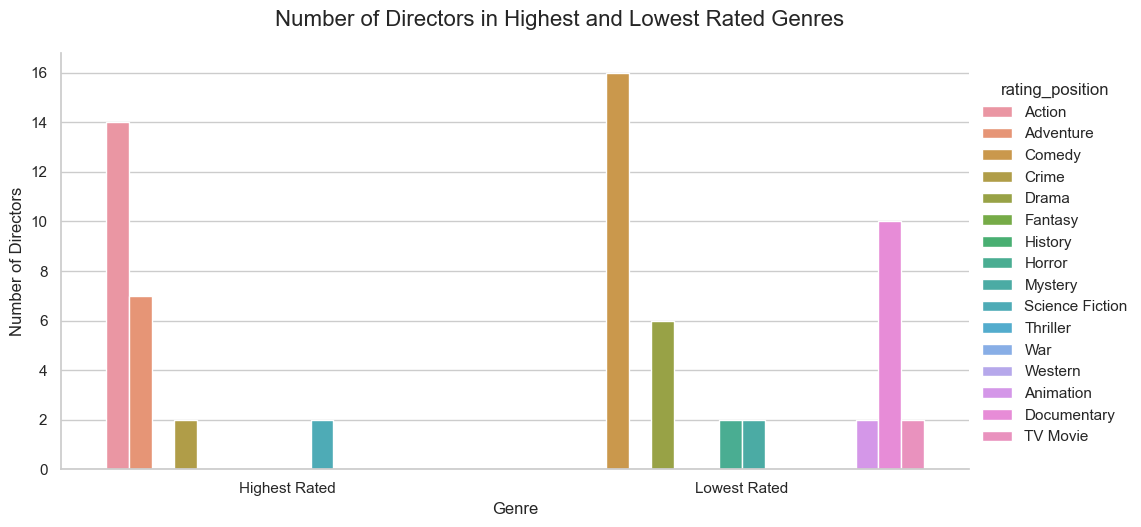

In [44]:
# Filter out directors with missing genre data
high_low_genre = high_low_pop_score[~high_low_pop_score['first_genre'].isna() | ~high_low_pop_score['last_genre'].isna()]

# Sort directors by popularity score and select top 20 and lowest 20
high_low_genre = high_low_genre.sort_values(by='highest_pop_score', ascending=False)
high_low_genre_top = high_low_genre.head(20)
high_low_genre_bottom = high_low_genre.tail(20)

# Count the number of directors in each genre for the top and bottom lists
top_genre_counts = high_low_genre_top.groupby('first_genre').size() + high_low_genre_top.groupby('last_genre').size()
bottom_genre_counts = high_low_genre_bottom.groupby('first_genre').size() + high_low_genre_bottom.groupby('last_genre').size()

# Create a long-format dataframe for plotting
plot_df = pd.concat([top_genre_counts, bottom_genre_counts], axis=1).reset_index().melt(id_vars=['index'], value_vars=[0, 1])
plot_df.columns = ['rating_position', 'genre', 'num_directors']

# Create the plot
sns.set(style="whitegrid")
g = sns.catplot(x='genre', y='num_directors', hue='rating_position', data=plot_df, kind='bar', height=5, aspect=2)

# Set the plot title and axis labels
g.fig.suptitle('Number of Directors in Highest and Lowest Rated Genres', y=1.05, fontsize=16)
g.set(xlabel='Genre', ylabel='Number of Directors')

# Define a dictionary to map x-axis values to labels
x_labels = {0: 'Highest Rated', 1: 'Lowest Rated'}

# Set the x-axis tick labels using the dictionary
ax = g.axes[0][0]
ax.set_xticklabels([x_labels[int(label.get_text())] for label in ax.get_xticklabels()])

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Show the plot
plt.show()



<a id='fig4.1'>Figure 4.1</a>
The visualization code creates a bar chart showing the number of directors in the top and bottom 20 movies by genre. The x-axis displays the position (highest or lowest) and the y-axis shows the number of directors. The hue represents the genre. The code sets the y-axis tick labels and x-axis tick labels using appropriate values and rotates the x-axis labels for better readability. The resulting plot can help to identify any genre-specific trends in the number of directors in the top and bottom movies.

This shows that the lowest rated Genre is Comedy while the highest is Action. 

<a id='rq5'></a>
### Research Question 5 - What was the highest rated genre vs the highest profitting genre? 

In [45]:
pop_g = df.groupby(['primary_genre'],sort=False).aggregate({'popularity':['mean','count'], 
                                                    'profit_infl_adj':['mean','sum']})
pop_g.columns = ['avg_pop_score', 'film_count', 'avg_profit', 'total_profit']

sorted_popg = pop_g.sort_values(by='film_count', ascending=False)

pop_by_genre = sorted_popg.reset_index()
pop_by_genre.columns = ['genre', 'avg_pop_score', 'film_count', 'avg_profit', 'total_profit'] 

pop_by_genre['avg_profit'] = pop_by_genre['avg_profit'].astype(int)


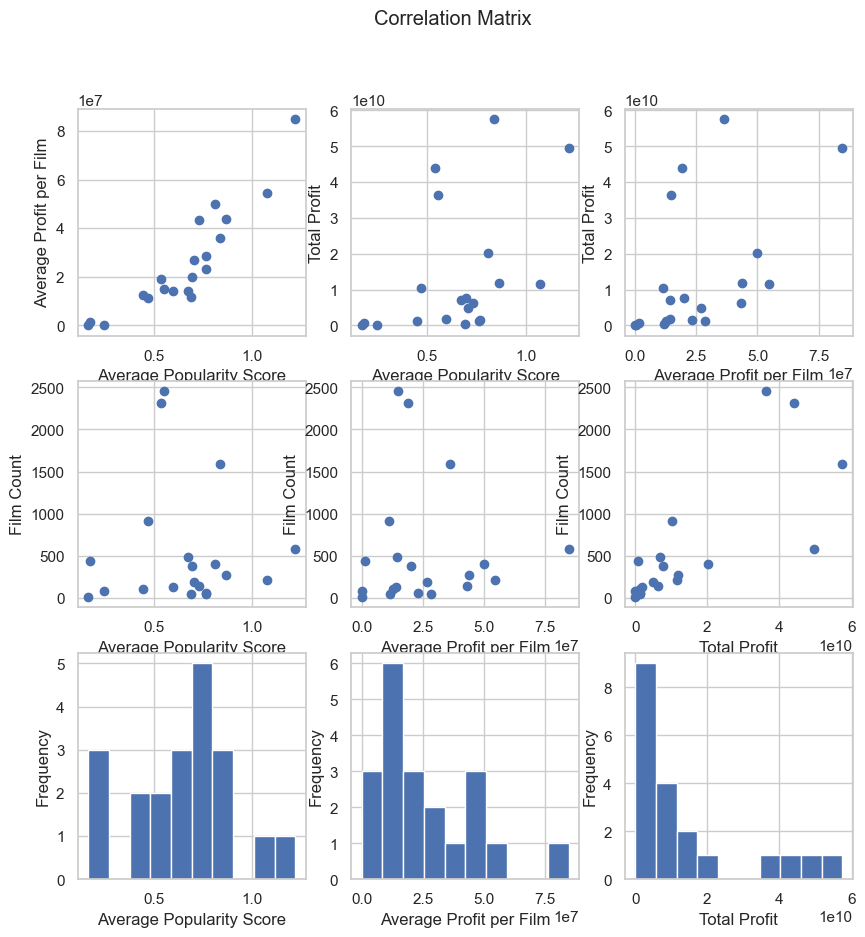

In [46]:
# Scatter plot matrix
fig, axs = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Correlation Matrix')

# Scatter plot for avg_pop_score vs avg_profit
axs[0, 0].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['avg_profit'])
axs[0, 0].set_xlabel('Average Popularity Score')
axs[0, 0].set_ylabel('Average Profit per Film')

# Scatter plot for avg_pop_score vs total_profit
axs[0, 1].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['total_profit'])
axs[0, 1].set_xlabel('Average Popularity Score')
axs[0, 1].set_ylabel('Total Profit')

# Scatter plot for avg_profit vs total_profit
axs[0, 2].scatter(pop_by_genre['avg_profit'], pop_by_genre['total_profit'])
axs[0, 2].set_xlabel('Average Profit per Film')
axs[0, 2].set_ylabel('Total Profit')

# Scatter plot for avg_pop_score vs film_count
axs[1, 0].scatter(pop_by_genre['avg_pop_score'], pop_by_genre['film_count'])
axs[1, 0].set_xlabel('Average Popularity Score')
axs[1, 0].set_ylabel('Film Count')

# Scatter plot for avg_profit vs film_count
axs[1, 1].scatter(pop_by_genre['avg_profit'], pop_by_genre['film_count'])
axs[1, 1].set_xlabel('Average Profit per Film')
axs[1, 1].set_ylabel('Film Count')

# Scatter plot for total_profit vs film_count
axs[1, 2].scatter(pop_by_genre['total_profit'], pop_by_genre['film_count'])
axs[1, 2].set_xlabel('Total Profit')
axs[1, 2].set_ylabel('Film Count')

# Histogram for avg_pop_score
axs[2, 0].hist(pop_by_genre['avg_pop_score'])
axs[2, 0].set_xlabel('Average Popularity Score')
axs[2, 0].set_ylabel('Frequency')

# Histogram for avg_profit
axs[2, 1].hist(pop_by_genre['avg_profit'])
axs[2, 1].set_xlabel('Average Profit per Film')
axs[2, 1].set_ylabel('Frequency')

# Histogram for total_profit
axs[2, 2].hist(pop_by_genre['total_profit'])
axs[2, 2].set_xlabel('Total Profit')
axs[2, 2].set_ylabel('Frequency')

plt.show()


<a id='fig5.1'>Figure 5.1</a>
The scatter plot matrix and histograms to explore the relationship between average popularity score, average profit per film, total profit, film count, and genre.

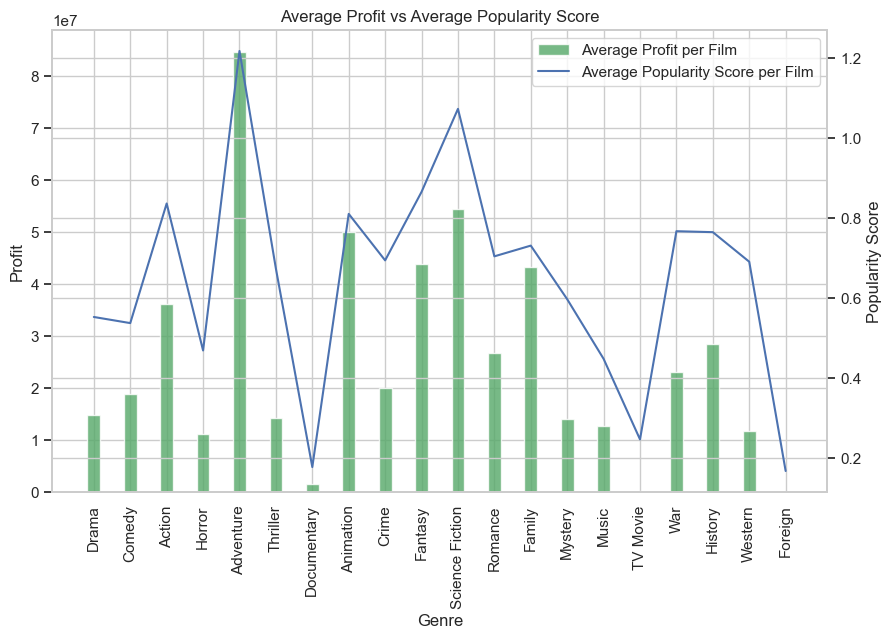

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
opacity = 0.8
index = list(range(len(pop_by_genre)))

# Bar for average profit per film
avg_profit_bar = ax.bar(index, pop_by_genre['avg_profit'], bar_width,
                        alpha=opacity,
                        color='g',
                        label='Average Profit per Film')

# Labels and title
ax.set_xlabel('Genre')
ax.set_ylabel('Profit')
ax.set_title('Average Profit vs Average Popularity Score')
ax.set_xticks(index)
ax.set_xticklabels(pop_by_genre.genre, rotation=90)

# Create a twin axis for the popularity score line
ax2 = ax.twinx()

# Plot the popularity score data on the secondary y-axis
pop_score_line = ax2.plot(index, pop_by_genre['avg_pop_score'], color='b', label='Average Popularity Score per Film')

# Set the secondary y-axis label
ax2.set_ylabel('Popularity Score')

# Add legend for both axes
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2)

plt.show()

<a id='fig5.2'>Figure 5.2</a>
The bar chart uses a twin axis to compare the average profit per film and average popularity score for each genre, highlighting the genres that have a higher popularity score than profit.

The average profit per film in each genre seems to be closely connected to the average popularity score for each genre. The only genres that have a significantly higher popularity score than the profit are 'War, History, and Westerns'. 

<a id='rq6'></a>
### Research Question 6 - What was the highest rated genre per director vs highest profitting genre per director?

In [48]:
director_genre_group = df.groupby(['director_primary', 'primary_genre']).agg({
    'popularity': 'mean',
    'release_date': 'count',
    'profit': ['mean', 'sum']
}).reset_index()

director_genre_group.columns = ['director', 'genre', 'avg_pop_score', 'film_count', 'avg_profit', 'total_profit']

sorted_dgg = director_genre_group.sort_values(by='film_count', ascending=False)

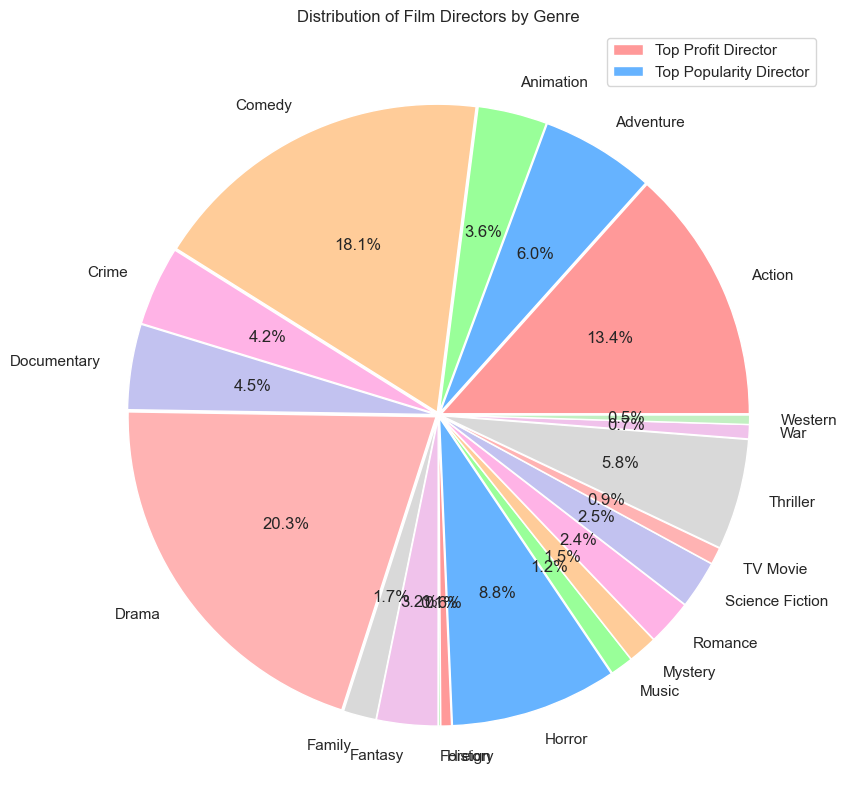

In [49]:
# group by genre and count how many directors had a film in each genre
genre_counts = sorted_dgg.groupby('genre')['director'].nunique()

# group by genre and find the director with the highest avg profit and highest avg pop score for each genre
top_profit_directors = sorted_dgg.groupby('genre').apply(lambda x: x.loc[x['avg_profit'].idxmax(), 'director'])
top_pop_directors = sorted_dgg.groupby('genre').apply(lambda x: x.loc[x['avg_pop_score'].idxmax(), 'director'])

# create a pie chart
fig, ax = plt.subplots(figsize=(12, 10))

# set the colors and explode values
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#ffb3e6','#c2c2f0','#ffb3b3','#d9d9d9','#f0c2eb','#c2f0c2']
explode = [0.01] * len(genre_counts)

# create the pie chart
ax.pie(genre_counts, labels=genre_counts.index, colors=colors, explode=explode, autopct='%1.1f%%')

# add title and legend
ax.set_title('Distribution of Film Directors by Genre')
ax.legend(loc='best', labels=['Top Profit Director', 'Top Popularity Director'])

plt.show()

<a id='fig6.1'>Figure 6.1</a>
This figure shows the distribution of film directors by genre, with a pie chart that uses different colors to represent different genres and slices of the pie representing the percentage of directors for each genre. The legend indicates the top profit director and top popularity director for each genre.

In [50]:
pivot_table = pd.pivot_table(director_genre_group, values=['avg_pop_score', 'avg_profit','total_profit'], index=['genre'], aggfunc={
    'avg_pop_score': lambda x: director_genre_group.loc[x.idxmax(), 'director'],
    'avg_profit': lambda x: director_genre_group.loc[x.idxmax(), 'director'],
    'total_profit': lambda x: director_genre_group.loc[x.idxmax(), 'director']
})

Within some of the genres the director with the highest average popularity score is also the director with the highest average profit. Reviewing for percent of directors who are listed in all 3 columns (avg_pop_score, avg_profit, and total_profit) for each genre. 

In [51]:
def get_similarity_ratio(s1, s2):
    return difflib.SequenceMatcher(None, s1, s2).ratio()

def check_all_three(row):
    dir1 = row['avg_pop_score']
    dir2 = row['avg_profit']
    dir3 = row['total_profit']
    similarity = get_similarity_ratio(dir1, dir2)
    if similarity >= 0.7:
        return 100 if dir1 == dir2 == dir3 else 0
    else:
        return 0

In [52]:
pivot_table['percent_directors_all_three'] = pivot_table.apply(check_all_three, axis=1)

pivot_table['percent_directors_2_of_3'] = pivot_table.apply(lambda x: 
    100 if ((x['avg_pop_score'] == x['avg_profit'] and x['avg_pop_score'] != x['total_profit']) or 
            (x['avg_pop_score'] == x['total_profit'] and x['avg_pop_score'] != x['avg_profit']) or 
            (x['avg_profit'] == x['total_profit'] and x['avg_profit'] != x['avg_pop_score'])) 
    else 0, axis=1)

pivot_table

,avg_pop_score,avg_profit,total_profit,percent_directors_all_three,percent_directors_2_of_3
genre,,,,,
Action,Colin Trevorrow,Colin Trevorrow,James Cameron,0,100
Adventure,Christopher Nolan,David Yates,Peter Jackson,0,0
Animation,Chris Buck,Chris Buck,Carlos Saldanha,0,100
Comedy,Peter Richardson,Pete Docter,Todd Phillips,0,0
Crime,Olivier Megaton,Irwin Winkler,Irwin Winkler,0,100
Documentary,Stephanie Soechtig,Jon M. Chu,Michael Moore,0,0
Drama,Alex Garland,James Cameron,Steven Spielberg,0,0
Family,Kyle Balda,Kyle Balda,Kyle Balda,100,0
Fantasy,MÃ¥ns MÃ¥rlind,Chris Miller,Sam Raimi,0,0


<a id='fig6.2'>Figure 6.2</a>
This figure shows a pivot table that summarizes the director, average popularity score, average profit, and total profit for each genre. The table also includes the percentage of directors who are listed in all three columns (average popularity score, average profit, and total profit) for each genre, and the percentage of directors who are listed in two of the three columns.

In [53]:
percent_all_three = pivot_table['percent_directors_all_three'].mean()
percent_2_of_3 = pivot_table[pivot_table['percent_directors_all_three'] == 0]['percent_directors_2_of_3'].mean()

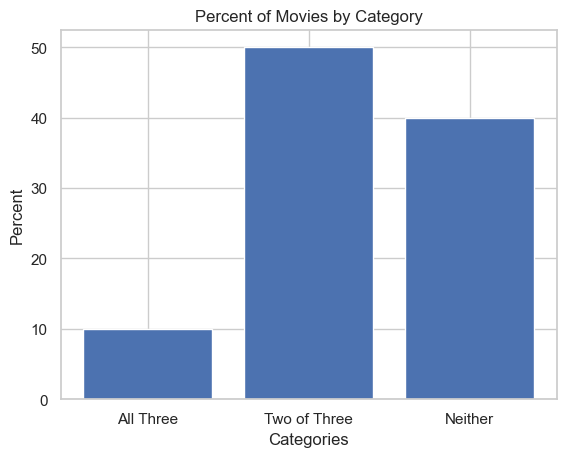

In [54]:
y_values = [percent_all_three, percent_2_of_3, 100 - percent_all_three - percent_2_of_3]

x_values = ['All Three', 'Two of Three', 'Neither']

plt.bar(x_values, y_values)

plt.xlabel('Categories')
plt.ylabel('Percent')
plt.title('Percent of Movies by Category')

plt.show()

<a id='fig6.3'>Figure 6.3</a>
This figure shows a bar chart that displays the percentage of movies by category, with categories including "All Three" (directors who were top in all three categories), "Two of Three" (directors who were top in two of the three categories), and "Neither" (directors who were not top in any of the categories). The chart shows that less than 2.5% of all movies were in the family and western genres, which were the only two genres with a director in all three categories.

Out of the 20 different genres only 2 directors were listed in all 3 categories for a single genre. 
The catagories avg_pop_score = Averge Popularity Score, avg_profit = Average Profit, and total_profit = Total Profit. This indicates rarely were directors the Top in all 3 categories and when they were it was in less saturated genres. 
Less than 2.5% of all movies were Family and Western which were the only 2 genres with a director in all 3 categories. 

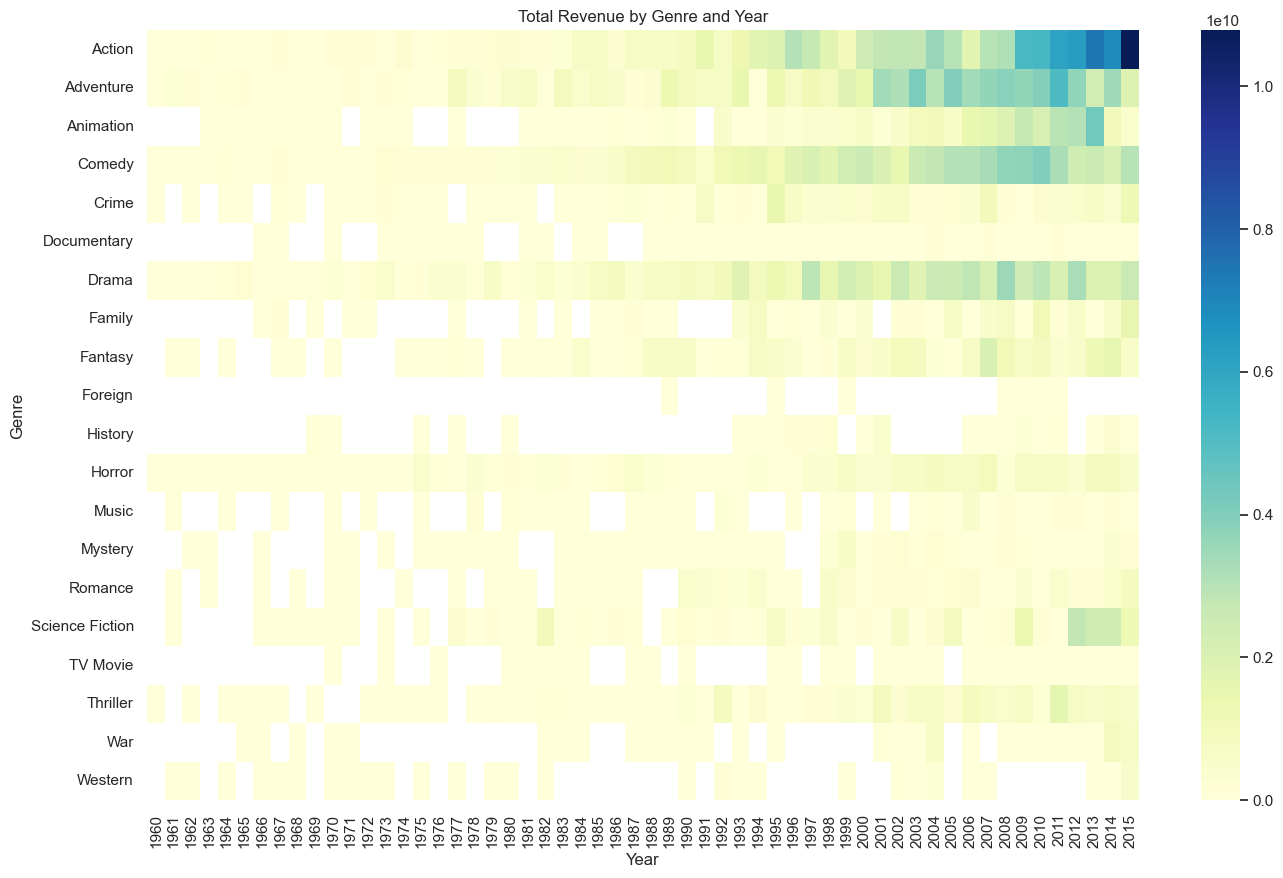

In [55]:
genre_year_df = df.groupby([df.release_date.dt.year, 'primary_genre']).revenue.sum().reset_index()

genre_year_pivot = genre_year_df.pivot(index='primary_genre', columns='release_date', values='revenue')

import seaborn as sns

plt.figure(figsize=(16,10))
sns.heatmap(genre_year_pivot, cmap="YlGnBu")
plt.title("Total Revenue by Genre and Year")
plt.xlabel("Year")
plt.ylabel("Genre")
plt.show()

<a id='fig6.4'>Figure 6.4</a>
This figure shows a heatmap that displays the total revenue by genre and year. The colors of the heatmap represent different levels of revenue, with darker colors indicating higher revenue. The heatmap shows that the revenue for action films began to increase in 2009 and reached its peak in 2015.

<a id='rq7'></a>
### Research Question 7 - When reviewing all the dataframes showing the top Directors using various metrics how frequently does each Director appear in the top 20? 

In [56]:
director_freq = {}

# Loop through each dataframe and count the frequency of each director in the top 20
for df in [sorted_dgg, pop_by_genre, high_low_pop_score, pop_by_director, high_low_by_director, top_all_time]:
    if 'director' in df.columns:
        director_col = 'director'
    elif 'director_primary' in df.columns:
        director_col = 'director_primary'
    else:
        continue
    
    for director in df[director_col][:20]:
        if pd.isna(director):
            continue
        
        if director in director_freq:
            director_freq[director] += 1
        else:
            director_freq[director] = 1
            
# Sort the directors by their frequency in the top 20
sorted_directors = sorted(director_freq.items(), key=lambda x: x[1], reverse=True)

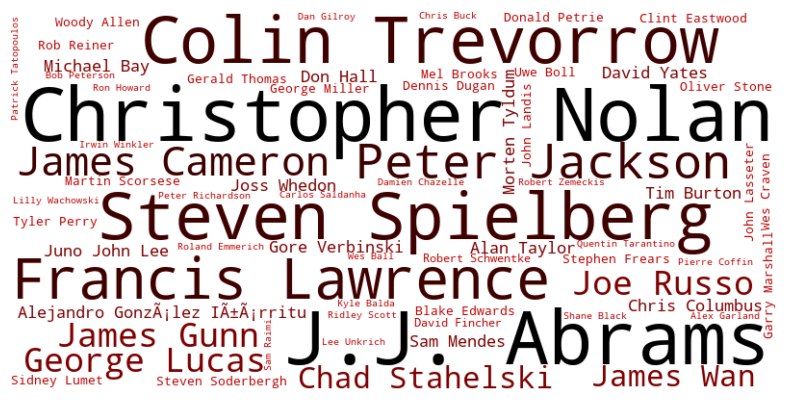

In [57]:
# Create a color function that maps each director to a color gradient based on their frequency
max_freq = max(director_freq.values())
def director_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    freq = director_freq[word]
    color = f'#{int(255*(max_freq-freq)/max_freq):02x}0000'
    return color

# Create a word cloud with a color gradient based on director frequency
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=director_color_func).generate_from_frequencies(director_freq)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


<a id='fig7.1'>Figure 7.1</a> 
This figure presents a word cloud that displays the top directors based on their frequency in the top 20 across different dataframes that use various metrics. The word cloud uses a color gradient based on the frequency of the director. 

In [61]:
# Create a dataframe from the sorted_directors list
df2 = pd.DataFrame(sorted_directors, columns=['director', 'frequency'])

# Create a dictionary to map each director to a color gradient based on their frequency
director_colors = {}
max_freq = df2['frequency'].max()
for i, (director, freq) in enumerate(zip(df2['director'], df2['frequency'])):
    director_colors[director] = f'rgba({int(255*i/len(df))}, 50, {int(255*(max_freq-freq)/max_freq)}, 1)'

# Create a horizontal bar chart with a color gradient based on director frequency
fig = px.bar(df2, x='frequency', y='director', orientation='h', color='director', color_discrete_map=director_colors)

fig.update_layout(title_text='Director Frequency Distribution Chart')

fig.show()


<a id='fig7.2'>Figure 7.2</a>
This horizontal bar chart that shows the frequency of the directors in the top 20 based on the different metrics used. The color gradient used in this chart is based on the frequency of the director as well.

Only 2 directors 'Christopher Nolan' and 'J.J. Abrams' appear in 4 of the different dataframes examining the differnt metrics that make a Top Director. 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#rq1">Research Question 1</a></li>
        <ul>
            <li><a href="#fig1.1">Figure 1.1</a></li>
            <li><a href="#fig1.2">Figure 1.2</a></li>
            <li><a href="#fig1.3">Figure 1.3</a></li>
            <li><a href="#fig1.4">Figure 1.4</a></li>
            <li><a href="#fig1.5">Figure 1.5</a></li>
            <li><a href="#fig1.6">Figure 1.6</a></li>
        </ul>
    <li><a href="#rq2">Research Question 2</a></li>
        <ul>
            <li><a href="#fig2.1">Figure 2.1</a></li>
            <li><a href="#fig2.2">Figure 2.2</a></li>
            <li><a href="#fig2.3">Figure 2.3</a></li>
            <li><a href="#fig2.4">Figure 2.4</a></li>
        </ul>
    <li><a href="#rq3">Research Question 3</a></li>
        <ul>
            <li><a href="#fig3.1">Figure 3.1</a></li>
        </ul>
    <li><a href="#rq4">Research Question 4</a></li>
        <ul>
            <li><a href="#fig4.1">Figure 4.1</a></li>
        </ul>
    <li><a href="#rq5">Research Question 5</a></li>
        <ul>
            <li><a href="#fig5.1">Figure 5.1</a></li>
            <li><a href="#fig5.2">Figure 5.2</a></li>
        </ul>
    <li><a href="#rq6">Research Question 6</a></li>
        <ul>
            <li><a href="#fig6.1">Figure 6.1</a></li>
            <li><a href="#fig6.2">Figure 6.2</a></li>
            <li><a href="#fig6.3">Figure 6.3</a></li>
            <li><a href="#fig6.4">Figure 6.4</a></li>
        </ul>
    <li><a href="#rq7">Research Question 7</a></li>
        <ul>
            <li><a href="#fig7.1">Figure 7.1</a></li>
            <li><a href="#fig7.2">Figure 7.2</a></li>
        </ul>
    </ul>
</ul>


<a id='conclusions'></a>
## Conclusions

There are many factors that are discussed on what makes a Director a top Director. Throughout this project I have reviewed the top Directors when measuring specific metrics. 

The metrics I used to determine whether a Director was a 'Top Director' were the following:
- The total profit (revenue - budget) a single director made for all films. *Found in the dataframe 'top_all_time'*
- Average profit per film for each Director. *Found in the dataframe 'top_all_time'*
- The average popularity score the Director recieved. *Found in the dataframe 'pop_by_director' and 'high_low_pop_score'* 
- Average popularity score by genre for each Director. *Found in the dataframe 'pop_by_genre' and 'sorted_dgg'* 
- Average profit based on genre for each Director. *Found in the dataframe 'sorted_dgg'* 
Then finally how many times a Director appeared in the Top 20 of each of the above metrics. *Found in the dataframe 'df2'* 

Based on the metrics used within the dataset provided Christopher Nolan and J.J. Abrams could be considered the Top Directors. They are the only Directors to appear in 4 of the 6 dataframe metrics noted above. 

We can also infer that Action is the highest profit and highest in popularity. So Directors that make more Action films may appear to be 'Top Directors' because the genre has a high popularity and popularity and profit often coenside as seen with dataframe 'pop_by_genre'. 




### Limitation

The data is limited as there are very few Foregin films or Directors noted within the dataset. While assuming the dataset is accurate we are not getting a deep look into the other directors and films produced. 

I had to make assumptions on the meaning of the columns 'popularity'. 

I addressed the concern for inflation skewing the data. 


## OPTIONAL: Question for the reviewer
 
If you have any question about the starter code or your own implementation, please add it in the cell below. 

For example, if you want to know why a piece of code is written the way it is, or its function, or alternative ways of implementing the same functionality, or if you want to get feedback on a specific part of your code or get feedback on things you tried but did not work.

Please keep your questions succinct and clear to help the reviewer answer them satisfactorily. 

> Would there have been a better way to show all of the graphs I have? When reviewing the information the way it is displayed looks less refined and potentially hard to follow. 

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])